{'C': 1.0, 'gamma': 1.0} 0.1545441769679097


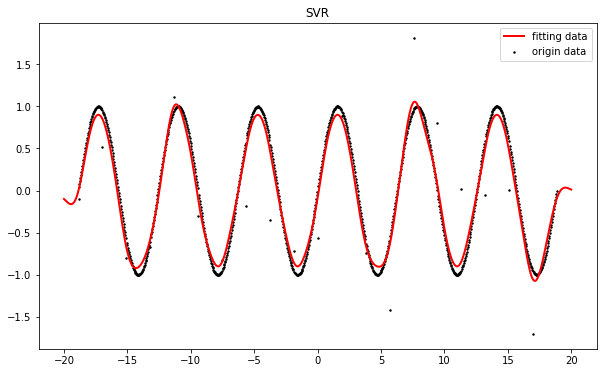

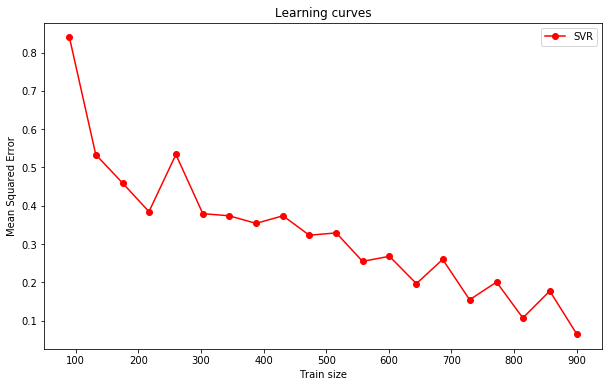

Train size: [ 90 132 175 217 260 303 345 388 431 473 516 558 601 644 686 729 772 814
 857 900]


In [14]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import math
%matplotlib inline
 
rng = np.random.RandomState(0)
 
#############################################################################
# 生成随机数据
X=np.linspace(-6*math.pi,6*math.pi,1000)
X=X.reshape((-1,1))

#X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
 
# 在标签中对每50个结果标签添加噪声
 
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
 
X_plot = np.linspace(-20, 20, 1000)[:, None]
 
#############################################################################
# 训练SVR模型
 
#训练规模
train_size = 1000
#初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
#记录训练时间
t0 = time.time()
#训练
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0

print(svr.best_params_,svr.best_score_)

t0 = time.time()
#测试
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
###########################################################################
# 对结果进行显示
plt.figure(figsize=(10,6))
plt.scatter(X[:1000], y[:1000],s=2, c='k', label='origin data', zorder=1)


plt.plot(X_plot, y_svr, c='r',label='fitting data',lw=2)
 #        label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
 
#plt.xlabel('data')
#plt.ylabel('value')
plt.title('SVR')
plt.legend()
 


#############################################################################
# 对学习过程进行可视化
plt.figure(figsize=(10,6))
#learning_curve 对不同大小的训练集，确定测试集分数
svr = SVR(kernel='rbf', C=1e1, gamma=.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:1000], y[:1000], train_sizes=np.linspace(0.1, 1, 20),
                   scoring="neg_mean_squared_error", cv=10)
 
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
 
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")
 
plt.show()

print('Train size:',train_sizes)

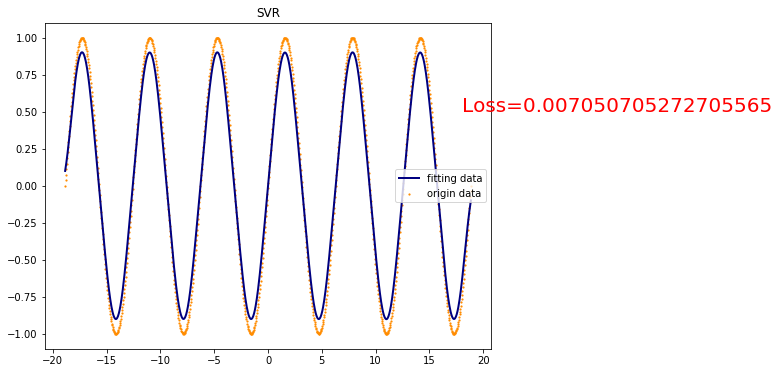

In [38]:
#c惩罚系数 c越大拟合越好
#gamma 与高斯宽度反比 gamma越大拟合越好 0.1与10区别不大 0.01欠拟合
import numpy as np  
from sklearn.svm import SVR  
import matplotlib.pyplot as plt  
import math
from sklearn.metrics import mean_squared_error
###############################################################################  
# Generate sample data  

#X = np.sort(20 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列  
#y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行  

###############################################################################  
# Add noise to targets  
#y[::5] += 3 * (0.5 - np.random.rand(8))  

x=np.linspace(-6*math.pi,6*math.pi,1000)
x=x.reshape((-1,1))
y=np.sin(x).ravel()
y=y+0.001*np.random.rand(1000)



###############################################################################  
# Fit regression model  
svr_rbf = SVR(kernel='rbf',C=1, gamma=1.0)    

#svr_lin = SVR(kernel='linear', C=1e3)  
#svr_poly = SVR(kernel='poly', C=1e3, degree=3)  

y_rbf= svr_rbf.fit(x, y).predict(x)  


#y_lin = svr_lin.fit(X, y).predict(X)  
#y_poly = svr_poly.fit(X, y).predict(X)  

###############################################################################  
# look at the results  
lw = 2 #line width  
plt.figure(figsize=(8,6))
plt.scatter(x, y,s=1.4, color='darkorange', label='origin data')  

#plt.hold('on')  

plt.plot(x, y_rbf, color='navy', lw=lw, label='fitting data')  

#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')  
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')  

error=mean_squared_error(y,y_rbf)
plt.text(18,0.5,'Loss='+str(error),fontdict={'size':20,'color':'red'})
plt.title('SVR')  
plt.legend()  
plt.show()


In [39]:
x_t=np.linspace(-6*math.pi,6*math.pi,50)
x_t=x_t.reshape((-1,1))
y_t=np.sin(x_t).ravel()
y_tp=svr_rbf.predict(x_t)
error=mean_squared_error(y_t,y_tp)
error

0.007307889791490505

# sinx/x

{'C': 1.0, 'gamma': 0.1} -0.5306559676716462


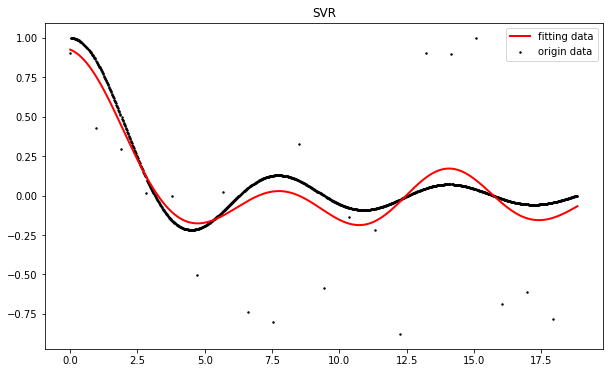

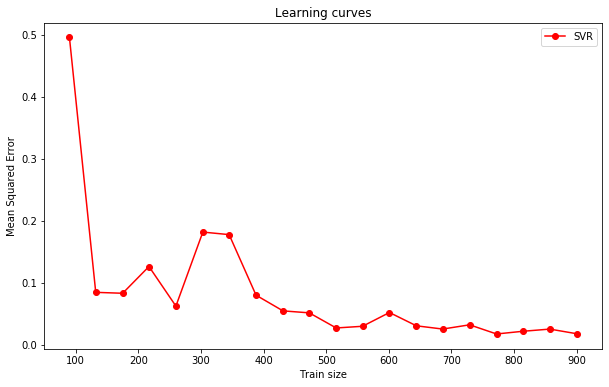

Train size: [ 90 132 175 217 260 303 345 388 431 473 516 558 601 644 686 729 772 814
 857 900]


In [29]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import math
%matplotlib inline
 
rng = np.random.RandomState(0)
 
#############################################################################
# 生成随机数据
X=np.linspace(0.0001,6*math.pi,1000)
X=X.reshape((-1,1))

#X = 5 * rng.rand(10000, 1)
y = (np.sin(X)/np.abs(X)).ravel()
 
# 在标签中对每50个结果标签添加噪声
 
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
 
X_plot = np.linspace(0.0001,6*math.pi , 1000)[:, None]
 
#############################################################################
# 训练SVR模型
 
#训练规模
train_size = 1000
#初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
#记录训练时间
t0 = time.time()
#训练
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0

print(svr.best_params_,svr.best_score_)

t0 = time.time()
#测试
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
###########################################################################
# 对结果进行显示
plt.figure(figsize=(10,6))
plt.scatter(X[:1000], y[:1000],s=2, c='k', label='origin data', zorder=1)


plt.plot(X_plot, y_svr, c='r',label='fitting data',lw=2)
 #        label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
 
#plt.xlabel('data')
#plt.ylabel('value')
plt.title('SVR')
plt.legend()
 


#############################################################################
# 对学习过程进行可视化
plt.figure(figsize=(10,6))
#learning_curve 对不同大小的训练集，确定测试集分数
svr = SVR(kernel='rbf', C=1e1, gamma=.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:1000], y[:1000], train_sizes=np.linspace(0.1, 1, 20),
                   scoring="neg_mean_squared_error", cv=10)
 
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
 
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")
 
plt.show()
b
print('Train size:',train_sizes)

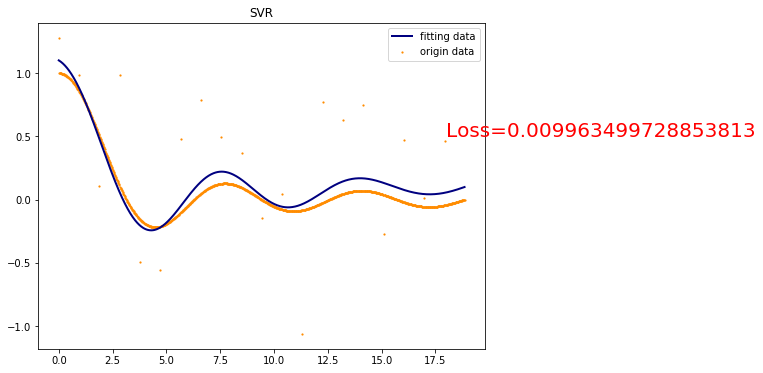

In [34]:
#c惩罚系数 c越大拟合越好
#gamma 与高斯宽度反比 gamma越大拟合越好 0.1与10区别不大 0.01欠拟合
import numpy as np  
from sklearn.svm import SVR  
import matplotlib.pyplot as plt  
import math
from sklearn.metrics import mean_squared_error
###############################################################################  
# Generate sample data  

#X = np.sort(20 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列  
#y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行  

###############################################################################  
# Add noise to targets  
#y[::5] += 3 * (0.5 - np.random.rand(8))  

x=np.linspace(0.0001,6*math.pi,1000)
x=x.reshape((-1,1))
y=(np.sin(x)/np.abs(x)).ravel()
#y=y+0.001*np.random.rand(1000)

y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))

###############################################################################  
# Fit regression model  
svr_rbf = SVR(kernel='rbf',C=1, gamma=0.1)    

#svr_lin = SVR(kernel='linear', C=1e3)  
#svr_poly = SVR(kernel='poly', C=1e3, degree=3)  

y_rbf= svr_rbf.fit(x, y).predict(x)  


#y_lin = svr_lin.fit(X, y).predict(X)  
#y_poly = svr_poly.fit(X, y).predict(X)  

###############################################################################  
# look at the results  
lw = 2 #line width  
plt.figure(figsize=(8,6))
plt.scatter(x, y,s=1.4, color='darkorange', label='origin data')  

#plt.hold('on')  

plt.plot(x, y_rbf, color='navy', lw=lw, label='fitting data')  

#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')  
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')  

error=mean_squared_error(y,y_rbf)
plt.text(18,0.5,'Loss='+str(error),fontdict={'size':20,'color':'red'})
plt.title('SVR')  
plt.legend()  
plt.show()


In [35]:
x_t=np.linspace(-6*math.pi,6*math.pi,50)
x_t=x_t.reshape((-1,1))
y_t=np.sin(x_t).ravel()
y_tp=svr_rbf.predict(x_t)
error=mean_squared_error(y_t,y_tp)
error

0.5919477092374256

# 1/x^3

{'C': 1.0, 'gamma': 0.01} -1499.7572932614692


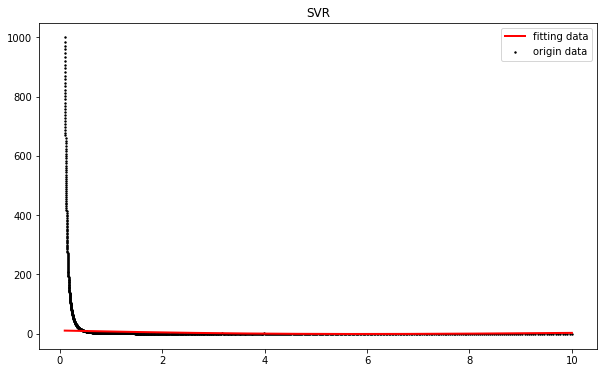

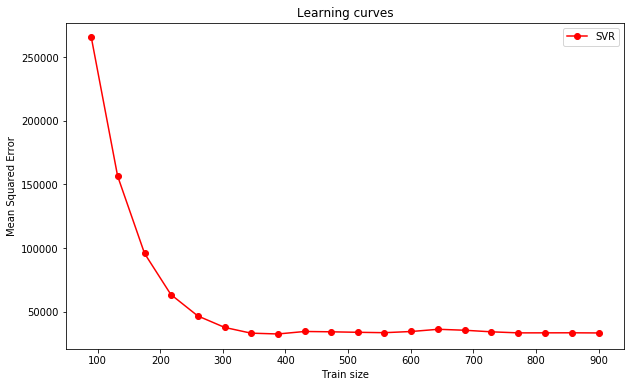

Train size: [ 90 132 175 217 260 303 345 388 431 473 516 558 601 644 686 729 772 814
 857 900]


In [24]:
from __future__ import division
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import math
%matplotlib inline
 
rng = np.random.RandomState(0)
 
#############################################################################
# 生成随机数据
X=np.logspace(-1,1,1000)
X=X.reshape((-1,1))

#X = 5 * rng.rand(10000, 1)
y = (1/X**3).ravel()
 
# 在标签中对每50个结果标签添加噪声
 
y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))
 
X_plot = np.logspace(-1,1, 1000)[:, None]
 
#############################################################################
# 训练SVR模型
 
#训练规模
train_size = 1000
#初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
#记录训练时间
t0 = time.time()
#训练
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0

print(svr.best_params_,svr.best_score_)

t0 = time.time()
#测试
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
###########################################################################
# 对结果进行显示
plt.figure(figsize=(10,6))
plt.scatter(X[:1000], y[:1000],s=2, c='k', label='origin data', zorder=1)


plt.plot(X_plot, y_svr, c='r',label='fitting data',lw=2)
 #        label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
 
#plt.xlabel('data')
#plt.ylabel('value')
plt.title('SVR')
plt.legend()
 


#############################################################################
# 对学习过程进行可视化
plt.figure(figsize=(10,6))
#learning_curve 对不同大小的训练集，确定测试集分数
svr = SVR(kernel='rbf', C=1e1, gamma=.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:1000], y[:1000], train_sizes=np.linspace(0.1, 1, 20),
                   scoring="neg_mean_squared_error", cv=10)
 
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
 
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")
 
plt.show()

print('Train size:',train_sizes)

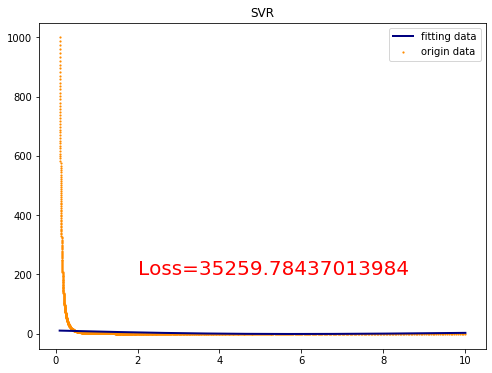

In [42]:
#c惩罚系数 c越大拟合越好
#gamma 与高斯宽度反比 gamma越大拟合越好 0.1与10区别不大 0.01欠拟合
import numpy as np  
from sklearn.svm import SVR  
import matplotlib.pyplot as plt  
import math
from sklearn.metrics import mean_squared_error
###############################################################################  
# Generate sample data  

#X = np.sort(20 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列  
#y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行  

###############################################################################  
# Add noise to targets  
#y[::5] += 3 * (0.5 - np.random.rand(8))  

x=np.logspace(-1,1,1000)
x=x.reshape((-1,1))
y=(1/x**3).ravel()
#y=y+0.001*np.random.rand(1000)

y[::50] += 2 * (0.5 - rng.rand(int(X.shape[0]/50)))

###############################################################################  
# Fit regression model  
svr_rbf = SVR(kernel='rbf',C=1, gamma=0.01)    

#svr_lin = SVR(kernel='linear', C=1e3)  
#svr_poly = SVR(kernel='poly', C=1e3, degree=3)  

y_rbf= svr_rbf.fit(x, y).predict(x)  


#y_lin = svr_lin.fit(X, y).predict(X)  
#y_poly = svr_poly.fit(X, y).predict(X)  

###############################################################################  
# look at the results  
lw = 2 #line width  
plt.figure(figsize=(8,6))
plt.scatter(x, y,s=1.4, color='darkorange', label='origin data')  

#plt.hold('on')  

plt.plot(x, y_rbf, color='navy', lw=lw, label='fitting data')  

#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')  
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')  

error=mean_squared_error(y,y_rbf)
plt.text(2,200,'Loss='+str(error),fontdict={'size':20,'color':'red'})
plt.title('SVR')  
plt.legend()  
plt.show()


In [44]:
x_t=np.logspace(-1,1,50)
x_t=x_t.reshape((-1,1))
y_t=(1/x_t**3).ravel()
y_tp=svr_rbf.predict(x_t)
error=mean_squared_error(y_t,y_tp)
error

44832.26565047266